# SportScience Data

```
Authors:
    Zach Wolpe
    zachcolinwolpe@gmail.com
    www.zachwolpe.com
    
    Michelle Gilfillan
    u16095503@tuks.co.za
```


### Description

A group of 4th year students investigated the _PERCIEVED_ barriers to entry to exercise. We have conducted a brief analysis of their findings. Bootstrapping is applied for inference as there as few datapoints.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('data to be analyzed.xlsx' , header=1)
df.columns = ['Name', 'Participant', 'Age', 'Sex', 'Lack of time',
       'Social Influence', 'Lack of energy', 'Lack of will power',
       'Fear of Injury', 'Lack of Skill', 'Lack of Resources']
print(df.shape)
df.head()

(55, 11)


,Name,Participant,Age,Sex,Lack of time,Social Influence,Lack of energy,Lack of will power,Fear of Injury,Lack of Skill,Lack of Resources
0,Boris Savvas,1,66.0,M,0,0,0,0,0,0,0
1,Pamela Strydom,2,80.0,F,0,0,3,0,0,1,1
2,Petrus Strydom,3,83.0,M,6,0,0,1,0,0,0
3,Elsa Eksteen,6,65.0,F,0,0,0,0,0,0,0
4,Rita Leibach,16,78.0,F,1,3,0,7,2,0,2


In [3]:
# Hangle missing data df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
Name                  55 non-null object
Participant           55 non-null object
Age                   50 non-null float64
Sex                   55 non-null object
Lack of time          55 non-null int64
Social Influence      55 non-null int64
Lack of energy        55 non-null int64
Lack of will power    55 non-null int64
Fear of Injury        55 non-null int64
Lack of Skill         55 non-null int64
Lack of Resources     55 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 4.8+ KB


# Impute Missing Data

Clean data: impute missing values & covert 'Gender' to a binary variable

In [4]:
# Impute missing values (Age using mean)
df['Age'] = df['Age'].fillna(df['Age'].mean())


# convert gender to binary
gender = {'M': 1,
          'F': 0}

df.Sex = [gender[i] for i in df.Sex]

df.head()

,Name,Participant,Age,Sex,Lack of time,Social Influence,Lack of energy,Lack of will power,Fear of Injury,Lack of Skill,Lack of Resources
0,Boris Savvas,1,66.0,1,0,0,0,0,0,0,0
1,Pamela Strydom,2,80.0,0,0,0,3,0,0,1,1
2,Petrus Strydom,3,83.0,1,6,0,0,1,0,0,0
3,Elsa Eksteen,6,65.0,0,0,0,0,0,0,0,0
4,Rita Leibach,16,78.0,0,1,3,0,7,2,0,2


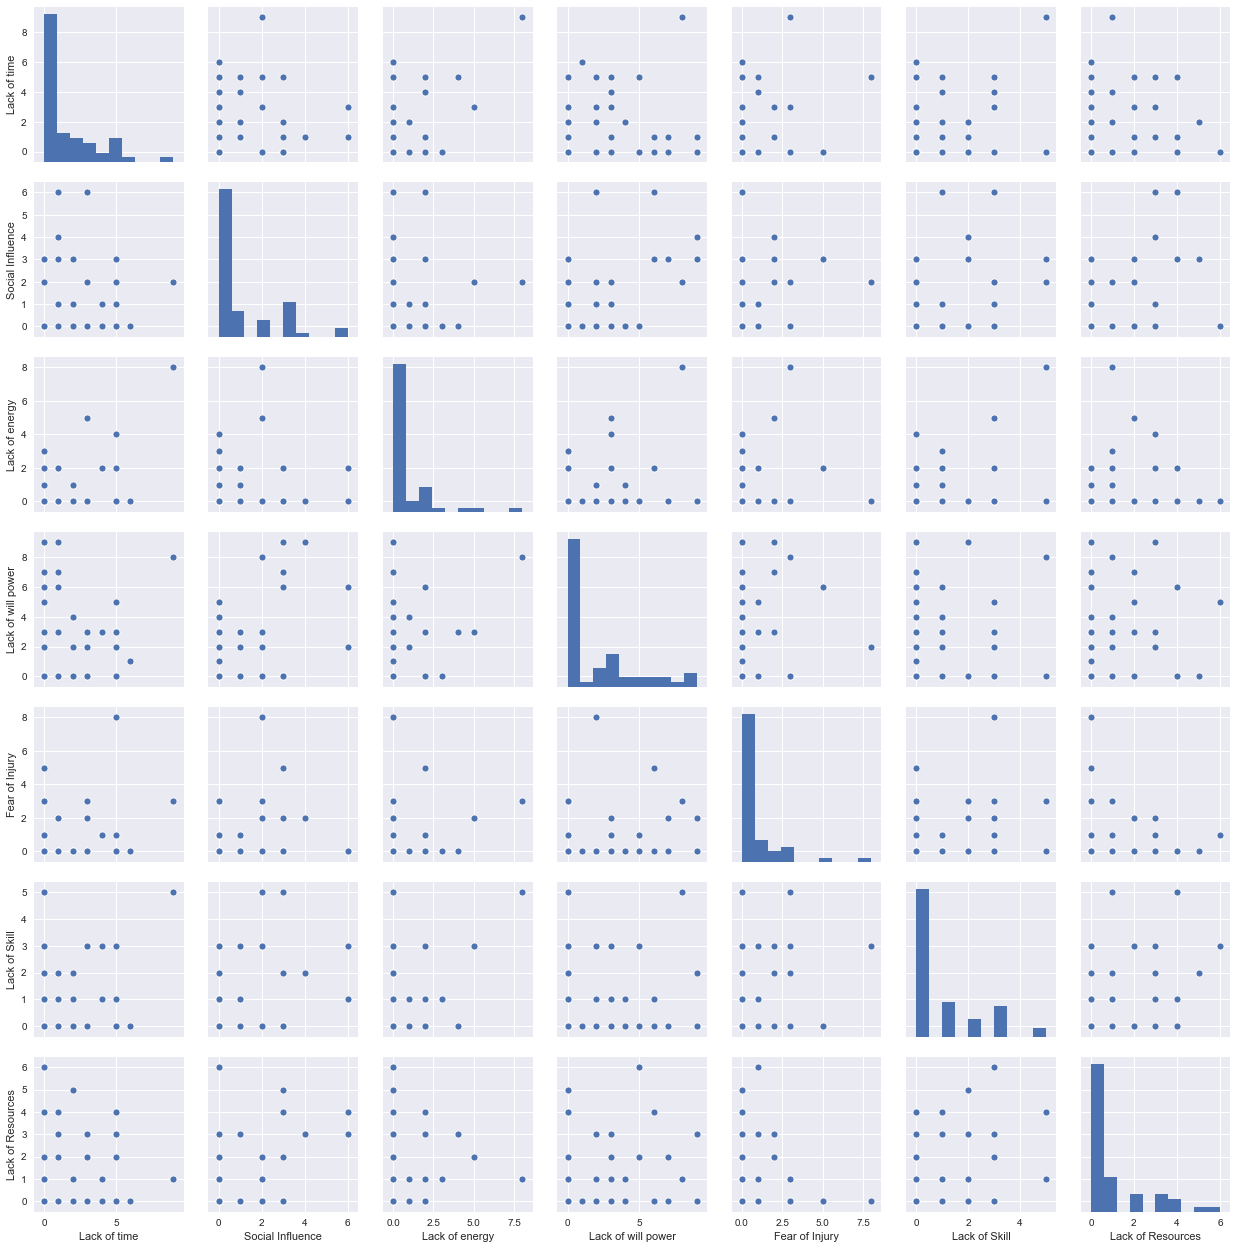

In [5]:
import seaborn as sns
# Basic correlogram
plt.style.use('seaborn')
sns.pairplot(df.iloc[:,4:], palette='YiGnBu')
plt.show()

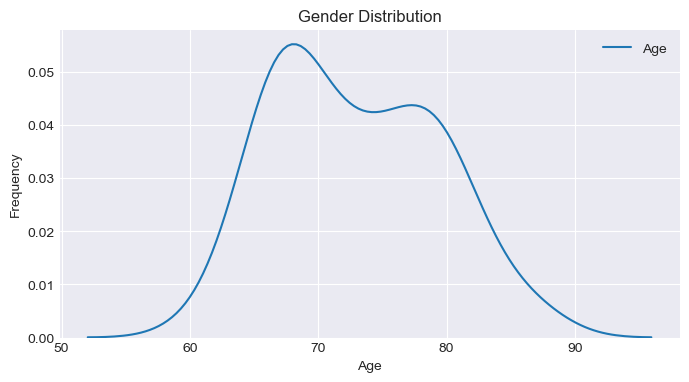

In [32]:
# age distribution
import seaborn as sns

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(8,4))
plt.xlabel('Age')
plt.title('Gender Distribution')
plt.ylabel('Frequency')
sns.kdeplot(df['Age']);

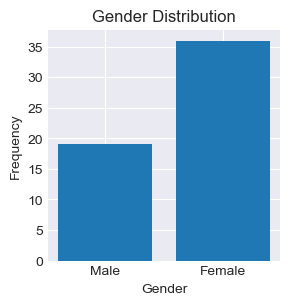

In [34]:
# age distribution
import seaborn as sns



plt.figure(figsize=(3,3))
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.ylabel('Frequency')
plt.bar(['Male', 'Female'], [df.Sex.sum(), len(df.Sex) - df.Sex.sum()]);

# plt.hist(df['Age'], bins=30, );

# Interpretation

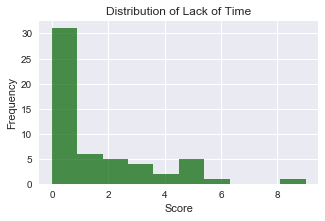

In [7]:
test = df['Lack of time']
test[:10]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(5,3))
plt.title('Distribution of Lack of Time')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(test, color='darkgreen', alpha=0.7);

# Correlation Matrix

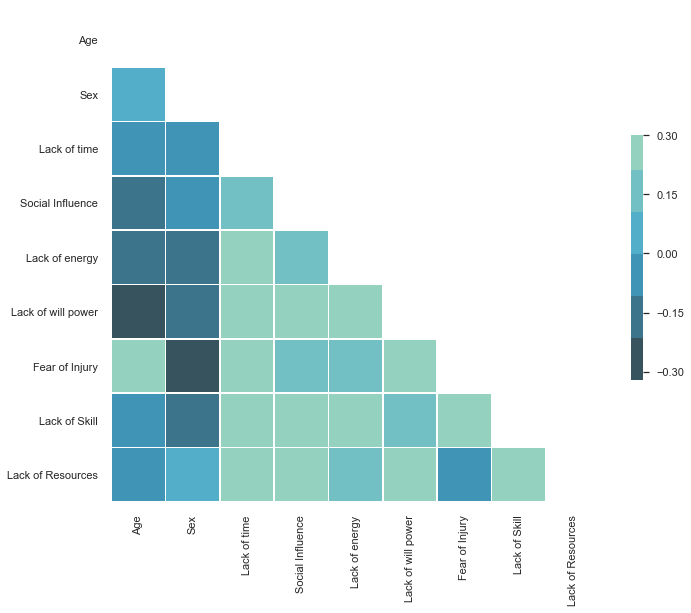

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


#np.corrcoef([df['Age'], df['Sex'], df['Lack of time'], df['Social Influence'], df['Lack of energy'],
# df['Lack of will power'], df['Fear of Injury'], df['Lack of Skill'], df['Lack of Resources']])
# Compute the correlation matrix
corr = df.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("GnBu_d")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Simplify the Model Binary

Most distributions are ZERO with a series of (decreasing) larger values. Consider a binary analysis wherein any value greater than $)$ is $1$

AttributeError: module 'seaborn' has no attribute 'title'

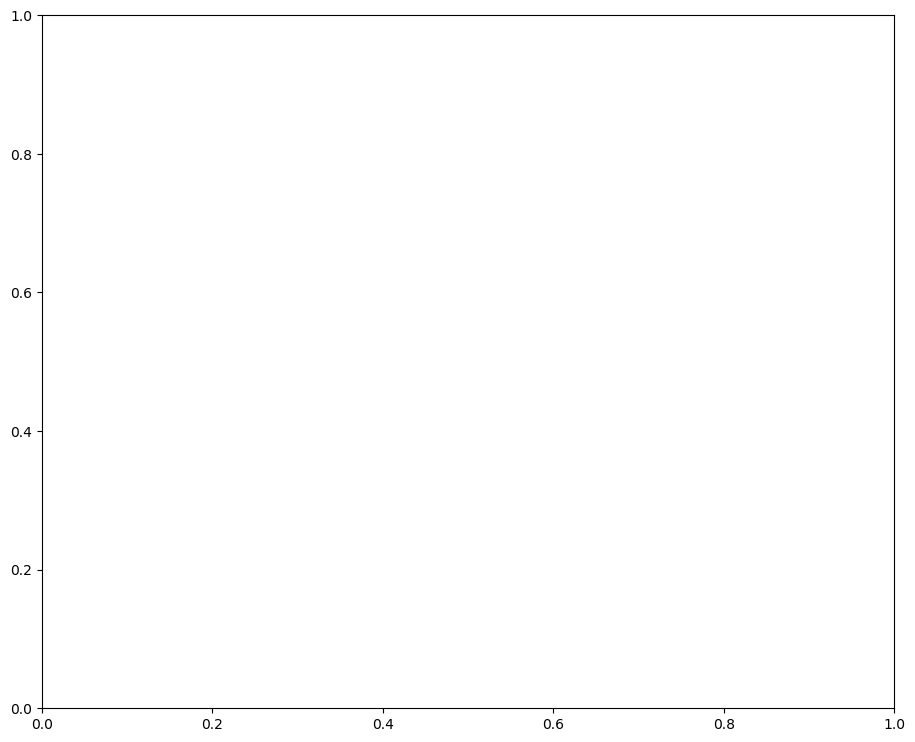

In [23]:
df_mod = df
df_mod.iloc[:,3:] = (df_mod.iloc[:,3:] > 0).astype(int)


# Compute the correlation matrix
corr = df_mod.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.cubehelix_palette(8)

# Draw the heatmap with the mask and correct aspect ratio
sns.title('test')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Model

Does Age & Gender Play a key roll? 


$Y$ = sum of each excuse, where the excuse score is capped at $1$

In [12]:
# Compute Y
import statsmodels.api as sm
y = np.array(df_mod.iloc[:,4:].sum(axis=1).values)

# Reformat X
X = np.array(df_mod.iloc[:,2:4].values)

# Add an Intercept
X = sm.add_constant(X)

# Feature Scaling
#X[:,1] = X[:,1] / (max(X[:,1]) - min(X[:,1]))

In [13]:


ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9188
Date:                Sun, 25 Aug 2019   Prob (F-statistic):              0.405
Time:                        19:55:44   Log-Likelihood:                -119.34
No. Observations:                  55   AIC:                             244.7
Df Residuals:                      52   BIC:                             250.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5557      3.457      1.607      0.114      -1.380      12.492
x1            -0.0381      0.047     -0.808      0.423      -0.133       0.057
x2            -0.6660      0.618     -1.078      0.286      -1.906       0.574
==============================================================================
Omnibus:                        4.466   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                2.766
Skew:                           0.351   Prob(JB):                        0.251
Kurtosis:                       2.155   Cond. No.                         861.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

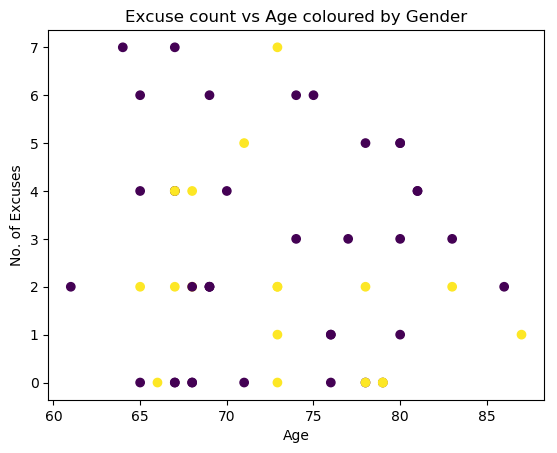

In [40]:
plt.style.use('default')
plt.xlabel('Age')
plt.title('Excuse count vs Age coloured by Gender')
plt.ylabel('No. of Excuses')
plt.scatter(X[:,1], y, c=X[:,-1]);

In [80]:
xy = np.concatenate((X, y.reshape((len(y), 1))), axis=1)

import scipy.stats as st
st.f_oneway(
xy[xy[:,2] == 1][:,-1],
xy[xy[:,2] == 0][:,-1]
)

F_onewayResult(statistic=1.1923737751769188, pvalue=0.27979028165752845)

In [79]:
xy[xy[:,2] == 1][:,-1]
xy[xy[:,2] == 0][:,-1]

array([3., 0., 5., 0., 2., 2., 3., 2., 3., 0., 7., 0., 2., 2., 6., 3., 0.,
       4., 1., 5., 6., 1., 0., 4., 5., 1., 2., 7., 4., 0., 4., 6., 4., 0.,
       0., 6.])

In [4]:
df = pd.read_excel('Updated and final data sheet.xlsx' )
df.head()

,"Surname, Initial(s)",Participant #,Age,Sex (M/F),KASARI,Active minutes/ week,BBAQ,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Resting Blood Pressure,Unnamed: 14,Resting HR,Stature (m),Mass (kg),BMI (kg/m²),Wasit-to-hip Ratio,% BF,2 min step test
0,NaN,NaN,NaN,NaN,NaN,active= > 150 inactive= <150mins,Lack of time,Social Influence,Lack of energy,Lack of will power,...,Lack of Resources,Systolic,Diastolic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Boris Savvas,1,66.0,M,48.0,active,0,0,0,0,...,0,110,70,60.0,1.72,84.7,28.63,0.91,26.5,127
2,Pamela Strydom,2,80.0,F,64.0,active,0,0,3,0,...,1,130,70,80.0,1.44,36.8,17.74,0.72,15.1,120
3,Petrus Strydom,3,83.0,M,40.0,active,6,0,0,1,...,0,120,65,64.0,1.64,63.9,23.47,0.86,21.2,120
4,Elsa Eksteen,6,65.0,F,48.0,active,0,0,0,0,...,0,110,65,52.0,1.63,52.0,19.57,0.75,28.3,107
